In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Cargar el dataset
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# Supongamos que estas son las columnas numéricas en el CSV
nuevos_nombres = {
    "4046": "categoria_a",
    "4225": "categoria_b",
    "4770": "categoria_c"
}

# Renombrar en el df
df.rename(columns=nuevos_nombres, inplace=True)

In [ ]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,categoria_a,categoria_b,categoria_c,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# Manejo de valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())
# Si hay nulos, imputar con la media o eliminar filas
# df.fillna(df.mean(), inplace=True)

Valores nulos por columna:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
categoria_a     0
categoria_b     0
categoria_c     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


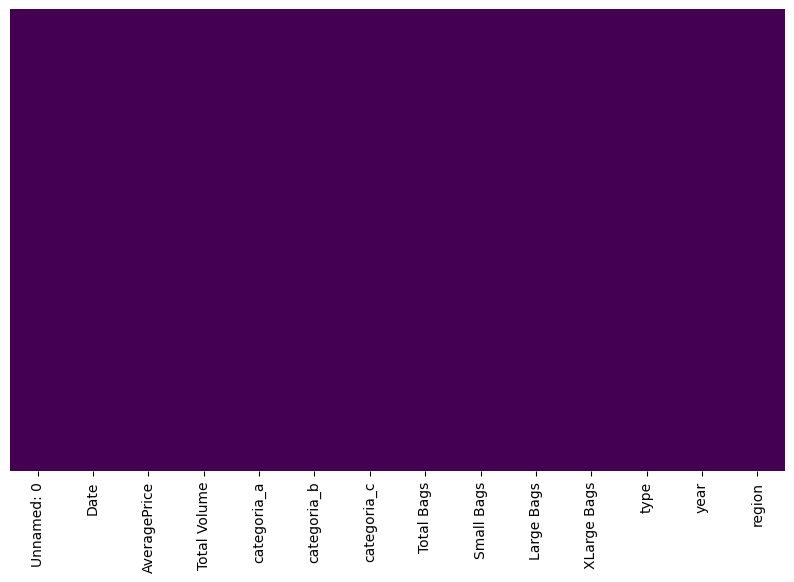

In [ ]:
# Visualización de valores nulos
# Esta grafica se realizo con el fin de observar si existen valores nulos en el dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [ ]:
df.columns = [col.lower().replace('%', '').strip().replace(' ', '_') for col in df.columns]
df.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

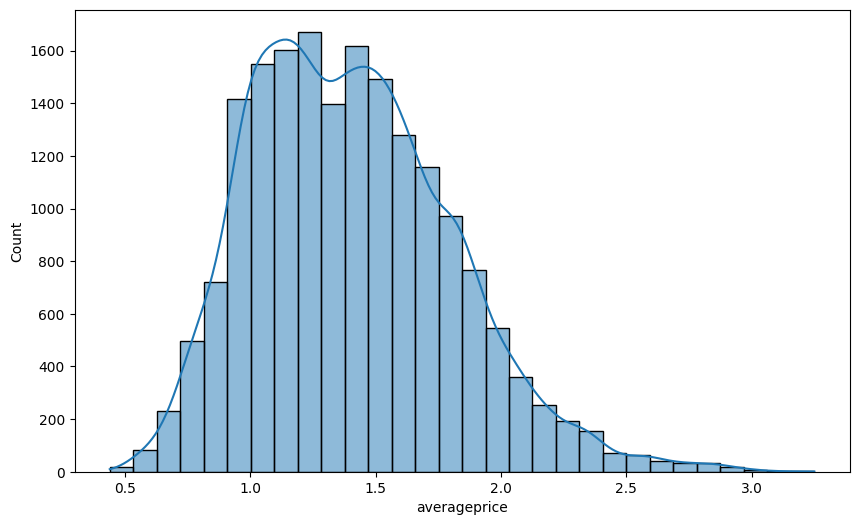

In [ ]:
#Media para el precio promedio

plt.figure(figsize=(10,6))
sns.histplot(df['averageprice'].dropna(), kde=True, bins=30)
plt.show()

In [ ]:
df_snow = df.copy()
df

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# Exploración inicial
print("Primeras filas:\n", df.head())
print("\nInformación del dataset:\n", df.info())
print("\nEstadísticas descriptivas:\n", df.describe())

Primeras filas:
    unnamed:_0        date  averageprice  total_volume  categoria_a  \
0           0  2015-12-27          1.33      64236.62      1036.74   
1           1  2015-12-20          1.35      54876.98       674.28   
2           2  2015-12-13          0.93     118220.22       794.70   
3           3  2015-12-06          1.08      78992.15      1132.00   
4           4  2015-11-29          1.28      51039.60       941.48   

   categoria_b  categoria_c  total_bags  small_bags  large_bags  xlarge_bags  \
0     54454.85        48.16     8696.87     8603.62       93.25          0.0   
1     44638.81        58.33     9505.56     9408.07       97.49          0.0   
2    109149.67       130.50     8145.35     8042.21      103.14          0.0   
3     71976.41        72.58     5811.16     5677.40      133.76          0.0   
4     43838.39        75.78     6183.95     5986.26      197.69          0.0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  

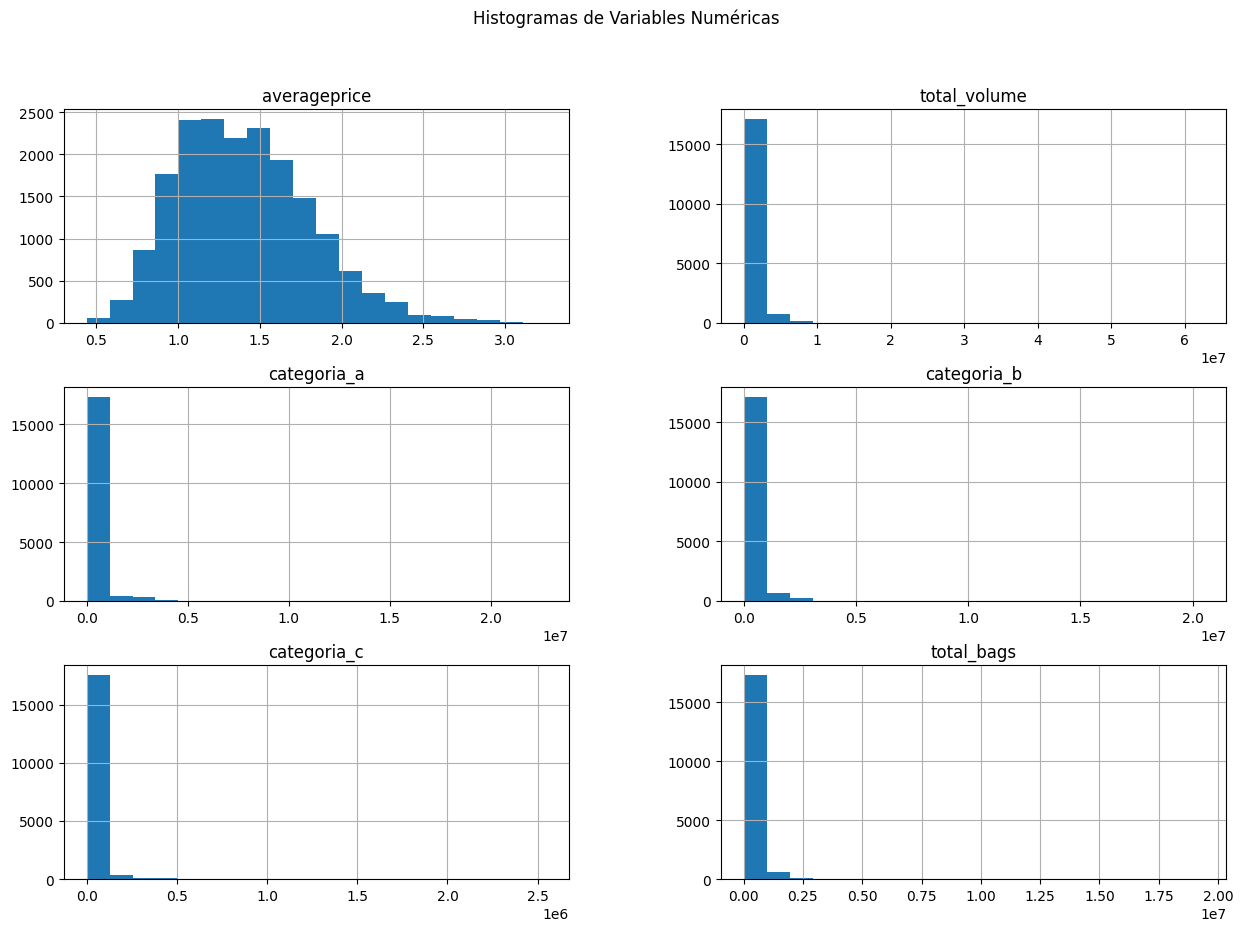

In [ ]:
# Histogramas de variables numéricas
# Update num_vars to match the modified column names in df
num_vars = ['averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags']
df[num_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

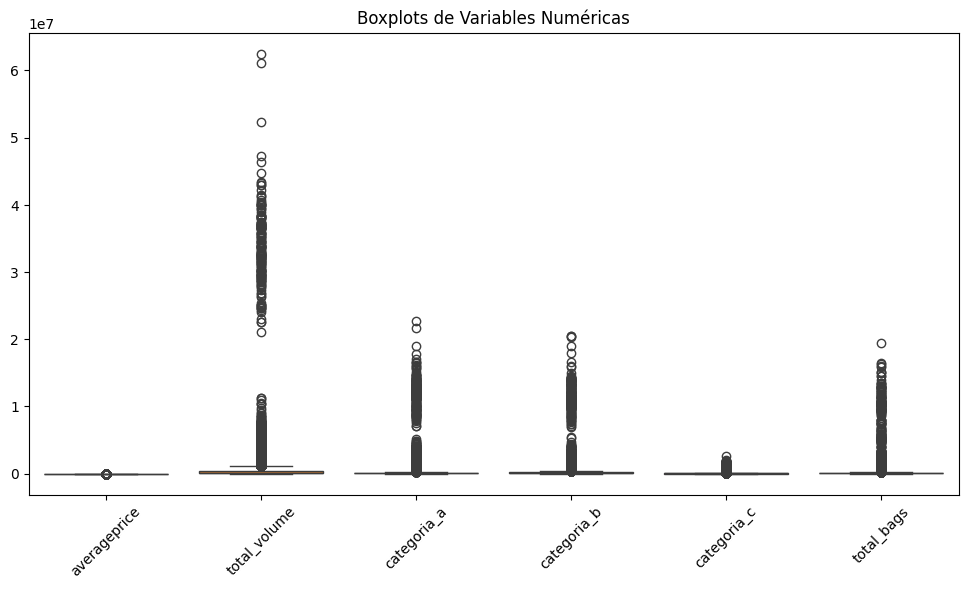

In [ ]:
# Boxplots para outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_vars])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

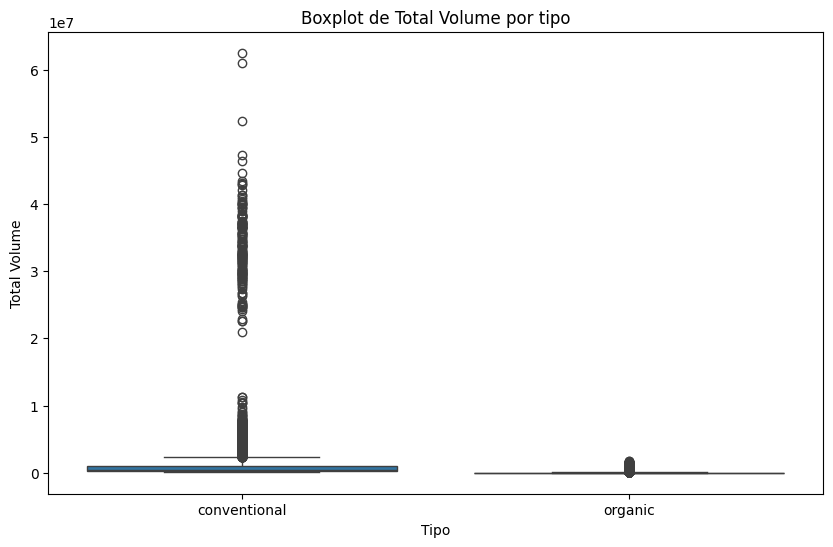

In [ ]:
#boxplot de type y total volume
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='total_volume', data=df)
plt.title('Boxplot de Total Volume por tipo')
plt.xlabel('Tipo')
plt.ylabel('Total Volume')
plt.show()

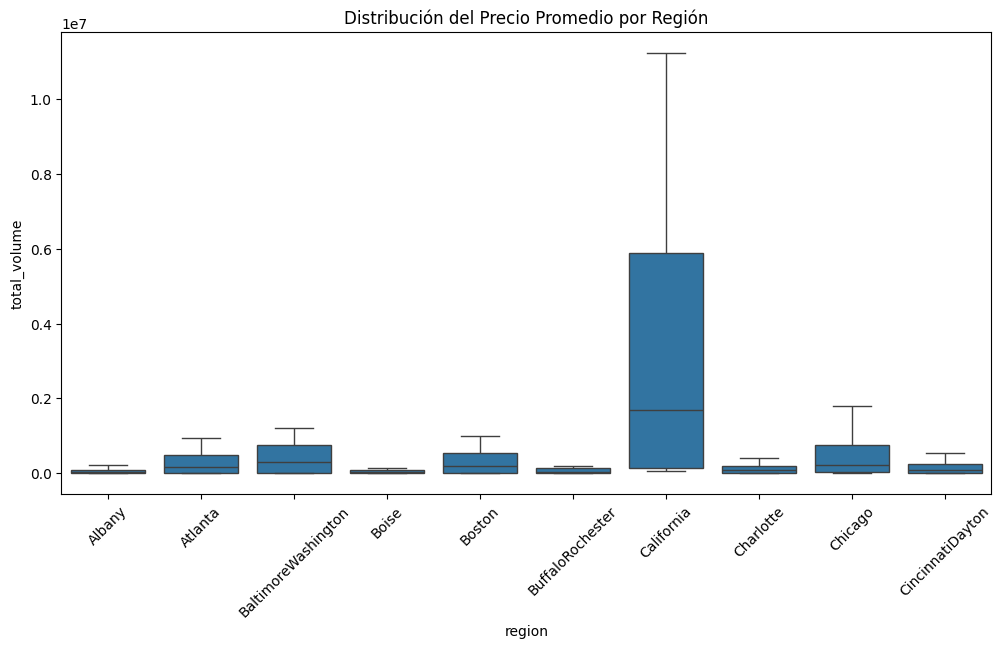

In [ ]:
# boxplot de region y numero total de aguacates vendidos
regiones_seleccionadas = df["region"].value_counts().index[:10]  # Tomar las 10 regiones con más datos
df_filtrado = df[df["region"].isin(regiones_seleccionadas)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtrado["region"], y=df_filtrado["total_volume"])
plt.xticks(rotation=45)
plt.title("Distribución del Precio Promedio por Región")
plt.show()

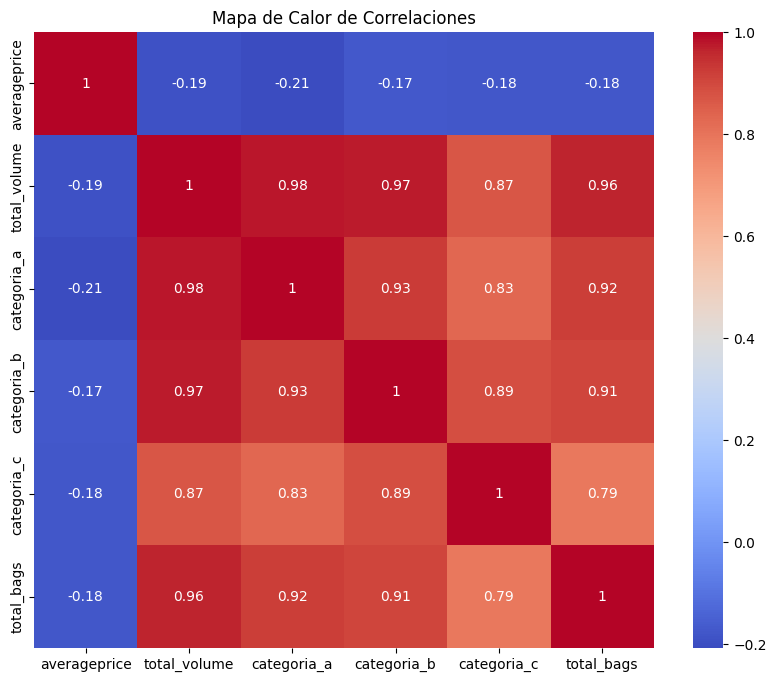

In [ ]:
# Heatmap de correlación
plt.figure(figsize=(10, 8))
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

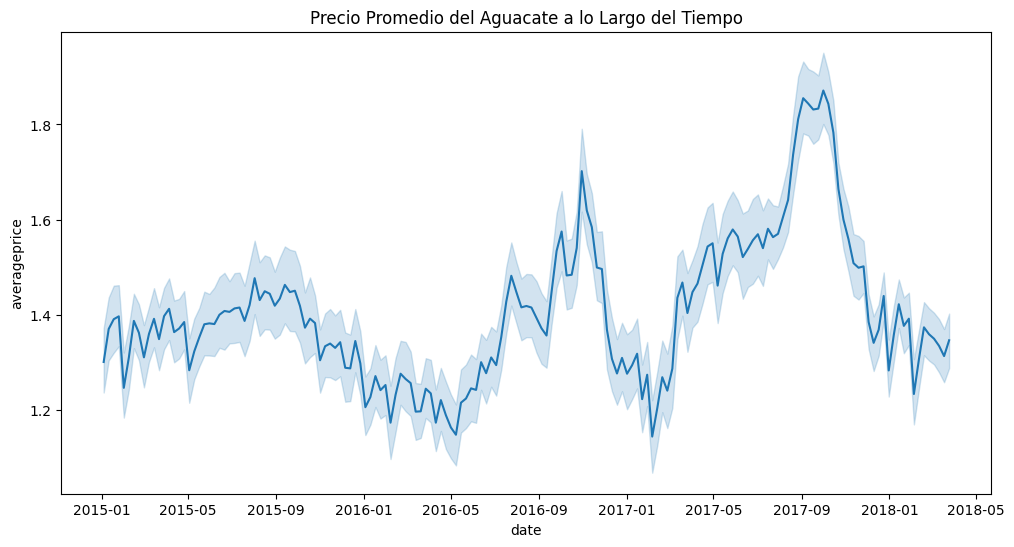

In [ ]:
# Evolución temporal del precio (si existe columna de fecha)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values('date', inplace=True)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='averageprice', data=df)
    plt.title('Precio Promedio del Aguacate a lo Largo del Tiempo')
    plt.show()

In [ ]:
# Tratamiento de outliers
Q1 = df['total_volume'].quantile(0.25)
Q3 = df['total_volume'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['total_volume'] >= Q1 - 1.5*IQR) & (df['total_volume'] <= Q3 + 1.5*IQR)]
df

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8850,0,2018-03-25,1.32,429132.50,258217.83,25970.97,1426.07,143517.63,90870.28,52357.35,290.00,conventional,2018,Orlando
17649,0,2018-03-25,1.74,38441.23,27.25,2031.54,0.00,36382.44,29466.95,6915.49,0.00,organic,2018,Boston
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [ ]:
# Variables categóricas a dummies
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

In [ ]:
# Definir variables
X = df.drop(['averageprice', 'date'], axis=1, errors='ignore')
y = df['averageprice']


In [ ]:
# Escalado
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [ ]:
y

11569    1.75
9593     1.49
10009    1.68
1819     1.52
9333     1.64
         ... 
8850     1.32
17649    1.74
8574     1.36
18141    1.42
17673    1.70
Name: averageprice, Length: 15952, dtype: float64

In [ ]:
# Dividir datos en entrenamiento (80%) y_scaled prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (12761, 64), (12761,)
Datos de prueba: (3191, 64), (3191,)


In [ ]:
# Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = scaler_y.inverse_transform(lr.predict(X_test).reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))
print("Regresión Lineal - MSE:", mean_squared_error(y_test_real, y_pred_lr), "R²:", r2_score(y_test_real, y_pred_lr))

Regresión Lineal - MSE: 0.07119585344801932 R²: 0.5634445271513714


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = scaler_y.inverse_transform(rf.predict(X_test).reshape(-1, 1))
print("Random Forest - MSE:", mean_squared_error(y_test_real, y_pred_rf), "R²:", r2_score(y_test_real, y_pred_rf))

Random Forest - MSE: 0.014574006320902538 R²: 0.9106357756443537


In [ ]:

# Red Neuronal
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = scaler_y.inverse_transform(nn.predict(X_test).reshape(-1, 1))
print("Red Neuronal - MSE:", mean_squared_error(y_test_real, y_pred_nn), "R²:", r2_score(y_test_real, y_pred_nn))

Red Neuronal - MSE: 0.015397331721719046 R²: 0.9055873466663352


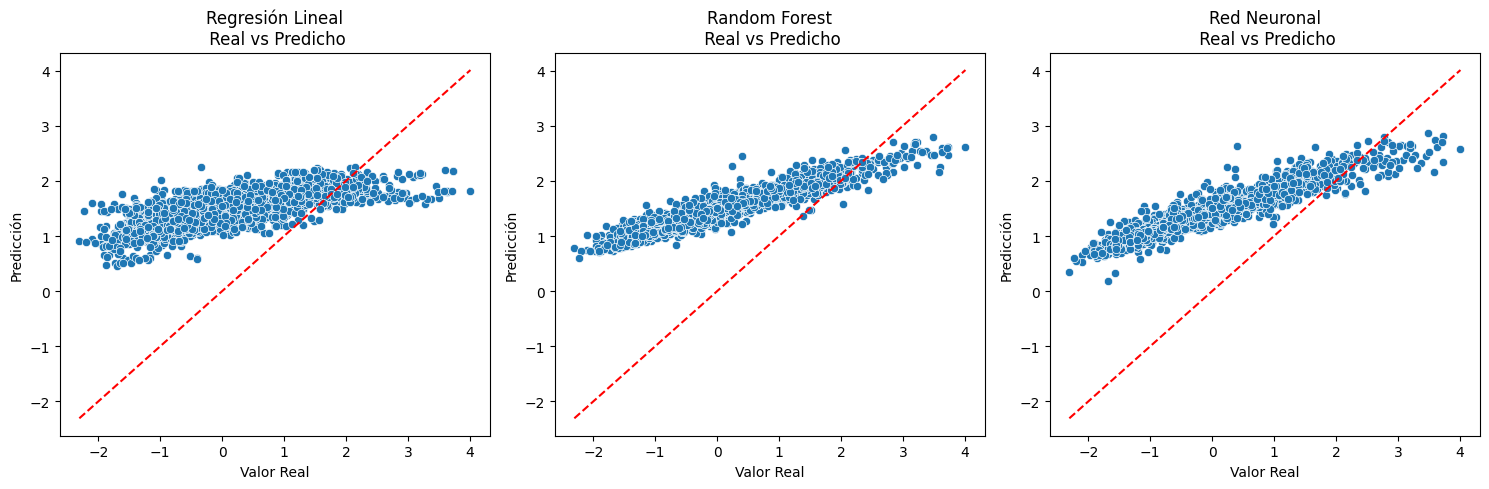

In [ ]:

# Crear figura
plt.figure(figsize=(15, 5))

# Regresión Lineal
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test.ravel(), y=y_pred_lr.ravel())
plt.title('Regresión Lineal\n Real vs Predicho')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test.ravel(), y=y_pred_rf.ravel())
plt.title('Random Forest\n Real vs Predicho')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Red Neuronal
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test.ravel(), y=y_pred_nn.ravel())
plt.title('Red Neuronal\n Real vs Predicho')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

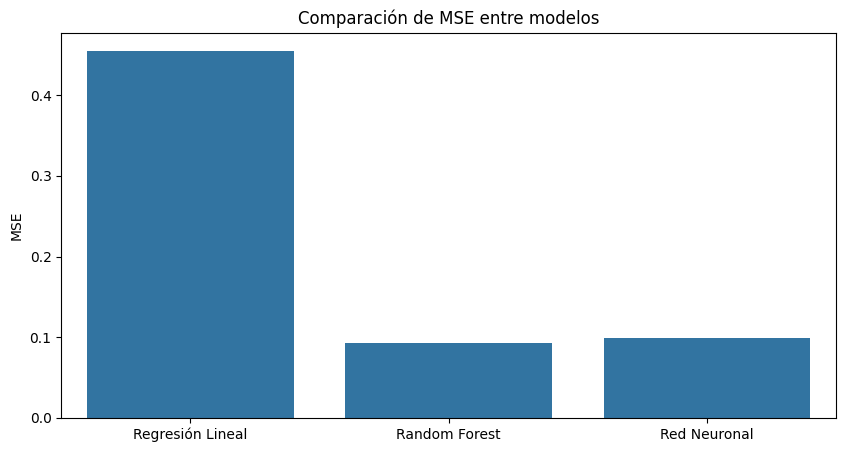

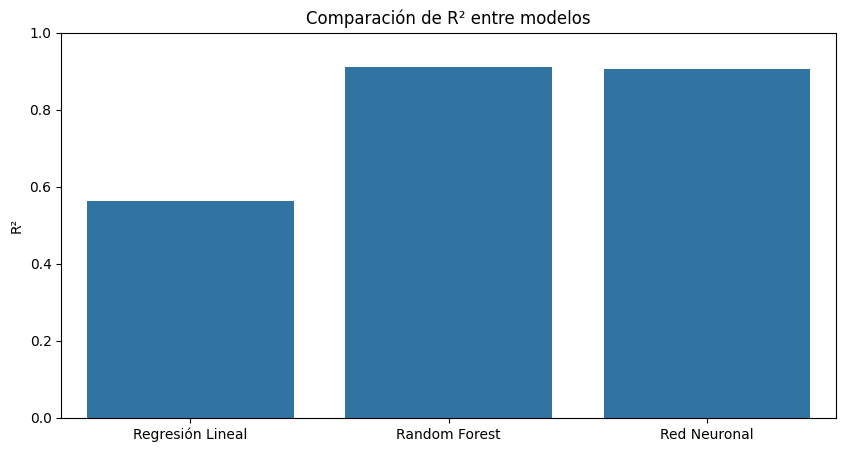

In [ ]:
# Métricas
mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_nn)
]
r2_values = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_nn)
]
models = ['Regresión Lineal', 'Random Forest', 'Red Neuronal']

# Graficar MSE : MSE – Error Cuadrático Medio (Mean Squared Error)
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mse_values)
plt.title('Comparación de MSE entre modelos')
plt.ylabel('MSE') 
plt.show()

# Graficar R² : R² – Coeficiente de Determinación
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_values)
plt.title('Comparación de R² entre modelos')
plt.ylabel('R²')
plt.ylim(0, 1)  # R² va de 0 a 1
plt.show()


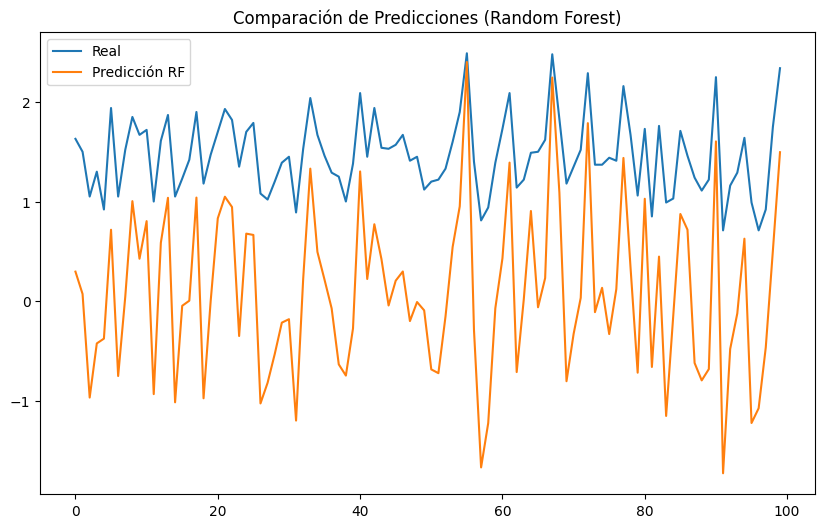

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_real[:100], label='Real')
plt.plot(y_pred_rf[:100], label='Predicción RF')
plt.title("Comparación de Predicciones (Random Forest)")
plt.legend()
plt.show()


In [ ]:
# Modelo 1: Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Regresión Lineal - Precio por aguacate - MSE:", mean_squared_error(y_test, y_pred_lr), "R²:", r2_score(y_test, y_pred_lr))

# Modelo 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest - Precio por aguacate - MSE:", mean_squared_error(y_test, y_pred_rf), "R²:", r2_score(y_test, y_pred_rf))

# Modelo 3: Red Neuronal
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("Red Neuronal - Precio por aguacate - MSE:", mean_squared_error(y_test, y_pred_nn), "R²:", r2_score(y_test, y_pred_nn))

Regresión Lineal - Precio por aguacate - MSE: 0.4547978931837879 R²: 0.5634445271513713
Random Forest - Precio por aguacate - MSE: 0.0930985029181932 R²: 0.9106357756443537
Red Neuronal - Precio por aguacate - MSE: 0.0983578914859478 R²: 0.9055873466663352


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Crear DataFrame con los resultados
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})

# Calcular el porcentaje de error
df_pred['porcentaje'] = (abs(df_pred['Error']) / df_pred['Actual']) * 100

# Asegurarnos que los valores negativos de Error sean positivos (ya lo hicimos con abs en Percentage_Error)
df_pred['Error'] = abs(df_pred['Error'])

# Mostrar la tabla con los resultados
df_pred

,Actual,Predicted,Error,porcentaje
0,0.447448,0.796896,0.349448,78.098182
1,0.118880,-1.114124,1.233004,1037.186839
2,-1.018471,-0.095573,0.922898,-90.616063
3,-0.386610,0.339888,0.726498,-187.915116
4,-1.347039,0.145198,1.492237,-110.779013
...,...,...,...,...
3186,2.621051,1.478890,1.142161,43.576461
3187,1.862817,0.769548,1.093269,58.689003
3188,-0.234963,-0.189004,0.045959,-19.560124
3189,-0.791001,0.133120,0.924121,-116.829361


In [ ]:
# Asegúrate de ejecutar las celdas anteriores que definen y_test, y_pred_lr, y_pred_rf, y_pred_nn
# Calcular residuos
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf
residuals_nn = y_test - y_pred_nn

plt.figure(figsize=(15, 5))

# Regresión Lineal
plt.subplot(1, 3, 1)
sns.histplot(residuals_lr, kde=True, color="blue")
plt.title('Errores - Regresión Lineal')

# Random Forest
plt.subplot(1, 3, 2)
sns.histplot(residuals_rf, kde=True, color="green")
plt.title('Errores - Random Forest')

# Red Neuronal
plt.subplot(1, 3, 3)
sns.histplot(residuals_nn, kde=True, color="purple")
plt.title('Errores - Red Neuronal')

plt.tight_layout()
plt.show()